In [113]:
import csv
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go2
import math
import zipfile
import pandas as pd
import statistics
from statistics import mean
from sklearn import feature_selection as fs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# col_2, col_13, col_17, col_20 are categorical variables.

In [114]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,CreditScore
0,22,14,8557.39,797.12,8,6,22,2,37,15.00,...,0,1767.29,25.40,143,2,13.17,91.95,3.00,264.59,2
1,37,1,19718.92,1676.24,10,9,19,6,27,11.00,...,2,2057.56,28.64,197,2,64.07,107.67,3.00,285.89,2
2,33,13,32045.78,2677.48,6,9,30,7,10,10.00,...,2,1333.18,30.05,76,2,169.77,62.68,4.00,285.30,2
3,42,4,62976.28,5321.02,0,3,12,0,9,0.00,...,1,68.66,40.66,191,1,0.00,70.78,4.00,711.32,1
4,39,2,57818.72,4864.23,7,7,21,2,56,16.00,...,0,2348.77,37.88,174,2,73.71,395.14,3.00,307.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85265,23,6,76230.76,6159.56,6,10,31,3,35,15.00,...,2,1961.73,34.22,242,2,15026.00,176.55,1.00,539.75,2
85266,46,0,110607.09,8997.26,4,4,2,3,2,9.00,...,1,1174.05,24.78,265,1,154.82,232.18,5.00,752.72,0
85267,50,8,96275.84,8101.99,6,6,19,1,7,18.00,...,2,999.36,28.34,321,0,64.96,129.83,NaN,855.41,0
85268,55,9,69388.26,5543.35,2,4,6,0,8,1.00,...,1,819.98,40.50,266,1,0.00,184.21,1.00,640.12,2


In [115]:
df.isnull().sum()

col_1              0
col_2              0
col_3              0
col_4          12817
col_5              0
col_6              0
col_7              0
col_8              0
col_9              0
col_10          6004
col_11          1799
col_12          1661
col_13             0
col_14             0
col_15             0
col_16             0
col_17             0
col_18             0
col_19          3836
col_20          6502
col_21          1024
CreditScore        0
dtype: int64

In [116]:
df_test.isnull().sum()

col_1       0
col_2       0
col_3       0
col_4     988
col_5       0
col_6       0
col_7       0
col_8       0
col_9       0
col_10    461
col_11    159
col_12    125
col_13      0
col_14      0
col_15      0
col_16      0
col_17      0
col_18      0
col_19    293
col_20    479
col_21     81
dtype: int64

In [117]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85270 entries, 0 to 85269
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   col_1        85270 non-null  int64  
 1   col_2        85270 non-null  int64  
 2   col_3        85270 non-null  float64
 3   col_4        72453 non-null  float64
 4   col_5        85270 non-null  int64  
 5   col_6        85270 non-null  int64  
 6   col_7        85270 non-null  int64  
 7   col_8        85270 non-null  int64  
 8   col_9        85270 non-null  int64  
 9   col_10       79266 non-null  float64
 10  col_11       83471 non-null  float64
 11  col_12       83609 non-null  float64
 12  col_13       85270 non-null  int64  
 13  col_14       85270 non-null  float64
 14  col_15       85270 non-null  float64
 15  col_16       85270 non-null  int64  
 16  col_17       85270 non-null  int64  
 17  col_18       85270 non-null  float64
 18  col_19       81434 non-null  float64
 19  col_

In [118]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   6762 non-null   int64  
 1   col_2   6762 non-null   int64  
 2   col_3   6762 non-null   float64
 3   col_4   5774 non-null   float64
 4   col_5   6762 non-null   int64  
 5   col_6   6762 non-null   int64  
 6   col_7   6762 non-null   int64  
 7   col_8   6762 non-null   int64  
 8   col_9   6762 non-null   int64  
 9   col_10  6301 non-null   float64
 10  col_11  6603 non-null   float64
 11  col_12  6637 non-null   float64
 12  col_13  6762 non-null   int64  
 13  col_14  6762 non-null   float64
 14  col_15  6762 non-null   float64
 15  col_16  6762 non-null   int64  
 16  col_17  6762 non-null   int64  
 17  col_18  6762 non-null   float64
 18  col_19  6469 non-null   float64
 19  col_20  6283 non-null   float64
 20  col_21  6681 non-null   float64
dtypes: float64(11), int64(10)
memory usag

Nominal data precess

In [119]:
data_nominal = df[['col_2','col_13','col_17','col_20']]
data_nominal


,col_2,col_13,col_17,col_20
0,14,0,2,3.00
1,1,2,2,3.00
2,13,2,2,4.00
3,4,1,1,4.00
4,2,0,2,3.00
...,...,...,...,...
85265,6,2,2,1.00
85266,0,1,1,5.00
85267,8,2,0,NaN
85268,9,1,1,1.00


In [120]:
data_nominal_test = df_test[['col_2','col_13','col_17','col_20']]
data_nominal_test

,col_2,col_13,col_17,col_20
0,8,0,2,4.00
1,8,0,2,3.00
2,9,1,1,5.00
3,11,1,1,4.00
4,6,2,2,4.00
...,...,...,...,...
6757,11,2,0,3.00
6758,14,3,2,1.00
6759,15,2,2,3.00
6760,7,2,2,NaN


In [121]:
df_label = df['CreditScore']

In [122]:
df_col_20 = data_nominal['col_20']
df_col_20_mode = statistics.mode(df_col_20)
data_nominal['col_20']=data_nominal['col_20'].fillna(df_col_20_mode)
print(data_nominal.isnull().sum())
data_nominal

col_2     0
col_13    0
col_17    0
col_20    0
dtype: int64


,col_2,col_13,col_17,col_20
0,14,0,2,3.00
1,1,2,2,3.00
2,13,2,2,4.00
3,4,1,1,4.00
4,2,0,2,3.00
...,...,...,...,...
85265,6,2,2,1.00
85266,0,1,1,5.00
85267,8,2,0,3.00
85268,9,1,1,1.00


In [123]:
df_col_20_test = data_nominal_test['col_20']
df_col_20_mode_test = statistics.mode(df_col_20_test)
data_nominal_test['col_20']=data_nominal_test['col_20'].fillna(df_col_20_mode_test)
print(data_nominal_test.isnull().sum())
data_nominal_test

col_2     0
col_13    0
col_17    0
col_20    0
dtype: int64


,col_2,col_13,col_17,col_20
0,8,0,2,4.00
1,8,0,2,3.00
2,9,1,1,5.00
3,11,1,1,4.00
4,6,2,2,4.00
...,...,...,...,...
6757,11,2,0,3.00
6758,14,3,2,1.00
6759,15,2,2,3.00
6760,7,2,2,3.00


In [124]:
pd.isnull(data_nominal).any()

col_2     False
col_13    False
col_17    False
col_20    False
dtype: bool

In [125]:
pd.isnull(data_nominal_test).any()

col_2     False
col_13    False
col_17    False
col_20    False
dtype: bool

In [126]:
"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

col_2_ohe = ohe.fit_transform(data_nominal[['col_2']]).toarray()
col_2_ohe_df = pd.DataFrame(col_2_ohe, columns= ohe.get_feature_names_out())
data_nominal = pd.concat([data_nominal,col_2_ohe_df],axis = 1)

col_13_ohe = ohe.fit_transform(data_nominal[['col_13']]).toarray()
col_13_ohe_df = pd.DataFrame(col_13_ohe, columns= ohe.get_feature_names_out())
data_nominal = pd.concat([data_nominal,col_13_ohe_df],axis = 1)

col_17_ohe = ohe.fit_transform(data_nominal[['col_17']]).toarray()
col_17_ohe_df = pd.DataFrame(col_17_ohe, columns= ohe.get_feature_names_out())
data_nominal = pd.concat([data_nominal,col_17_ohe_df],axis = 1)

col_20_ohe = ohe.fit_transform(data_nominal[['col_20']]).toarray()
col_20_ohe_df = pd.DataFrame(col_20_ohe, columns= ohe.get_feature_names_out())
data_nominal = pd.concat([data_nominal,col_20_ohe_df],axis = 1)

data_nominal = data_nominal.drop('col_2',axis=1)
data_nominal = data_nominal.drop('col_13',axis=1)
data_nominal = data_nominal.drop('col_17',axis=1)
data_nominal = data_nominal.drop('col_20',axis=1)

data_nominal
"""


"\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\n\ncol_2_ohe = ohe.fit_transform(data_nominal[['col_2']]).toarray()\ncol_2_ohe_df = pd.DataFrame(col_2_ohe, columns= ohe.get_feature_names_out())\ndata_nominal = pd.concat([data_nominal,col_2_ohe_df],axis = 1)\n\ncol_13_ohe = ohe.fit_transform(data_nominal[['col_13']]).toarray()\ncol_13_ohe_df = pd.DataFrame(col_13_ohe, columns= ohe.get_feature_names_out())\ndata_nominal = pd.concat([data_nominal,col_13_ohe_df],axis = 1)\n\ncol_17_ohe = ohe.fit_transform(data_nominal[['col_17']]).toarray()\ncol_17_ohe_df = pd.DataFrame(col_17_ohe, columns= ohe.get_feature_names_out())\ndata_nominal = pd.concat([data_nominal,col_17_ohe_df],axis = 1)\n\ncol_20_ohe = ohe.fit_transform(data_nominal[['col_20']]).toarray()\ncol_20_ohe_df = pd.DataFrame(col_20_ohe, columns= ohe.get_feature_names_out())\ndata_nominal = pd.concat([data_nominal,col_20_ohe_df],axis = 1)\n\ndata_nominal = data_nominal.drop('col_2',axis=1)\ndata_nominal = dat

In [127]:
"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

col_2_ohe_test = ohe.fit_transform(data_nominal_test[['col_2']]).toarray()
col_2_ohe_df_test = pd.DataFrame(col_2_ohe_test, columns= ohe.get_feature_names_out())
data_nominal_test = pd.concat([data_nominal_test,col_2_ohe_df_test],axis = 1)

col_13_ohe_test = ohe.fit_transform(data_nominal_test[['col_13']]).toarray()
col_13_ohe_df_test = pd.DataFrame(col_13_ohe_test, columns= ohe.get_feature_names_out())
data_nominal_test = pd.concat([data_nominal_test,col_13_ohe_df_test],axis = 1)

col_17_ohe_test = ohe.fit_transform(data_nominal_test[['col_17']]).toarray()
col_17_ohe_df_test = pd.DataFrame(col_17_ohe_test, columns= ohe.get_feature_names_out())
data_nominal_test = pd.concat([data_nominal_test,col_17_ohe_df_test],axis = 1)

col_20_ohe_test = ohe.fit_transform(data_nominal_test[['col_20']]).toarray()
col_20_ohe_df_test = pd.DataFrame(col_20_ohe_test, columns= ohe.get_feature_names_out())
data_nominal_test = pd.concat([data_nominal_test,col_20_ohe_df_test],axis = 1)

data_nominal_test = data_nominal_test.drop('col_2',axis=1)
data_nominal_test = data_nominal_test.drop('col_13',axis=1)
data_nominal_test = data_nominal_test.drop('col_17',axis=1)
data_nominal_test = data_nominal_test.drop('col_20',axis=1)

data_nominal_test
"""


"\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\n\ncol_2_ohe_test = ohe.fit_transform(data_nominal_test[['col_2']]).toarray()\ncol_2_ohe_df_test = pd.DataFrame(col_2_ohe_test, columns= ohe.get_feature_names_out())\ndata_nominal_test = pd.concat([data_nominal_test,col_2_ohe_df_test],axis = 1)\n\ncol_13_ohe_test = ohe.fit_transform(data_nominal_test[['col_13']]).toarray()\ncol_13_ohe_df_test = pd.DataFrame(col_13_ohe_test, columns= ohe.get_feature_names_out())\ndata_nominal_test = pd.concat([data_nominal_test,col_13_ohe_df_test],axis = 1)\n\ncol_17_ohe_test = ohe.fit_transform(data_nominal_test[['col_17']]).toarray()\ncol_17_ohe_df_test = pd.DataFrame(col_17_ohe_test, columns= ohe.get_feature_names_out())\ndata_nominal_test = pd.concat([data_nominal_test,col_17_ohe_df_test],axis = 1)\n\ncol_20_ohe_test = ohe.fit_transform(data_nominal_test[['col_20']]).toarray()\ncol_20_ohe_df_test = pd.DataFrame(col_20_ohe_test, columns= ohe.get_feature_names_out())\ndata_nomin

Numerical data process

In [128]:
numerical_data = df[['col_1','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10','col_11','col_12','col_14','col_15','col_16','col_18','col_19','col_21']]
numerical_data

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_14,col_15,col_16,col_18,col_19,col_21
0,22,8557.39,797.12,8,6,22,2,37,15.00,7.64,7.00,1767.29,25.40,143,13.17,91.95,264.59
1,37,19718.92,1676.24,10,9,19,6,27,11.00,NaN,13.00,2057.56,28.64,197,64.07,107.67,285.89
2,33,32045.78,2677.48,6,9,30,7,10,10.00,17.19,11.00,1333.18,30.05,76,169.77,62.68,285.30
3,42,62976.28,5321.02,0,3,12,0,9,0.00,6.05,3.00,68.66,40.66,191,0.00,70.78,711.32
4,39,57818.72,4864.23,7,7,21,2,56,16.00,4.09,12.00,2348.77,37.88,174,73.71,395.14,307.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85265,23,76230.76,6159.56,6,10,31,3,35,15.00,11.93,14.00,1961.73,34.22,242,15026.00,176.55,539.75
85266,46,110607.09,8997.26,4,4,2,3,2,9.00,4.26,6.00,1174.05,24.78,265,154.82,232.18,752.72
85267,50,96275.84,8101.99,6,6,19,1,7,18.00,2.94,5.00,999.36,28.34,321,64.96,129.83,855.41
85268,55,69388.26,5543.35,2,4,6,0,8,1.00,14.16,2.00,819.98,40.50,266,0.00,184.21,640.12


In [129]:
numerical_data_test = df_test[['col_1','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10','col_11','col_12','col_14','col_15','col_16','col_18','col_19','col_21']]
numerical_data_test

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_14,col_15,col_16,col_18,col_19,col_21
0,26,62846.31,NaN,9,8,20,7,40,18.00,1.79,10.00,4073.62,32.46,27,284.98,182.48,321.86
1,26,44632.44,3419.37,10,6,33,5,15,18.00,23.48,6.00,3409.13,39.33,77,154.14,394.73,83.06
2,41,28062.39,NaN,5,5,7,1,25,1.00,9.74,3.00,839.85,36.59,217,14.84,21.87,443.05
3,37,88406.34,NaN,2,7,12,4,10,3.00,9.06,3.00,1273.15,25.82,378,242.24,203.66,515.43
4,38,30739.30,2298.61,4,4,13,6,15,10.00,16.70,4.00,1365.58,29.73,213,135.24,24.70,319.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,17,18157.95,1095.81,6,7,28,2,30,12.00,9.03,15.00,1795.88,25.97,98,217.31,149.34,247.82
6758,16,16059.88,1436.32,7,3,5,4,24,20.00,16.62,4.00,1402.44,29.64,175,49.59,95.08,268.97
6759,31,33643.54,3048.63,4,6,20,5,12,17.00,8.56,8.00,1300.70,29.57,185,70.54,291.01,233.31
6760,40,38842.50,3136.88,5,7,9,4,21,13.00,9.33,8.00,1662.17,23.75,153,115.05,204.22,284.42


In [130]:
"""
df_col_4 = numerical_data['col_4']
df_col_10 = numerical_data['col_10']
df_col_11 = numerical_data['col_11']
df_col_12 = numerical_data['col_12']
df_col_19 = numerical_data['col_19']
df_col_21 = numerical_data['col_21']

df_col_4_median = statistics.median(df_col_4)
df_col_10_median = statistics.median(df_col_10)
df_col_11_median = statistics.median(df_col_11)
df_col_12_median = statistics.median(df_col_12)
df_col_19_median = statistics.median(df_col_19)
df_col_21_median = statistics.median(df_col_21)

numerical_data['col_4']=numerical_data['col_4'].fillna(df_col_4_median)
numerical_data['col_10']=numerical_data['col_10'].fillna(df_col_10_median)
numerical_data['col_11']=numerical_data['col_11'].fillna(df_col_11_median)
numerical_data['col_12']=numerical_data['col_12'].fillna(df_col_12_median)
numerical_data['col_19']=numerical_data['col_19'].fillna(df_col_19_median)
numerical_data['col_21']=numerical_data['col_21'].fillna(df_col_21_median)
"""

"\ndf_col_4 = numerical_data['col_4']\ndf_col_10 = numerical_data['col_10']\ndf_col_11 = numerical_data['col_11']\ndf_col_12 = numerical_data['col_12']\ndf_col_19 = numerical_data['col_19']\ndf_col_21 = numerical_data['col_21']\n\ndf_col_4_median = statistics.median(df_col_4)\ndf_col_10_median = statistics.median(df_col_10)\ndf_col_11_median = statistics.median(df_col_11)\ndf_col_12_median = statistics.median(df_col_12)\ndf_col_19_median = statistics.median(df_col_19)\ndf_col_21_median = statistics.median(df_col_21)\n\nnumerical_data['col_4']=numerical_data['col_4'].fillna(df_col_4_median)\nnumerical_data['col_10']=numerical_data['col_10'].fillna(df_col_10_median)\nnumerical_data['col_11']=numerical_data['col_11'].fillna(df_col_11_median)\nnumerical_data['col_12']=numerical_data['col_12'].fillna(df_col_12_median)\nnumerical_data['col_19']=numerical_data['col_19'].fillna(df_col_19_median)\nnumerical_data['col_21']=numerical_data['col_21'].fillna(df_col_21_median)\n"

In [131]:
"""
df_col_4_test = numerical_data_test['col_4']
df_col_10_test = numerical_data_test['col_10']
df_col_11_test = numerical_data_test['col_11']
df_col_12_test = numerical_data_test['col_12']
df_col_19_test = numerical_data_test['col_19']
df_col_21_test = numerical_data_test['col_21']

df_test_col_4 = np.array(df_col_4_test)

df_test_col_4_median = np.nanmedian(df_test_col_4)

#df_col_4_median_test = statistics.median(df_col_4_test)
df_col_10_median_test = statistics.median(df_col_10_test)
df_col_11_median_test = statistics.median(df_col_11_test)
df_col_12_median_test = statistics.median(df_col_12_test)
df_col_19_median_test = statistics.median(df_col_19_test)
df_col_21_median_test = statistics.median(df_col_21_test)

numerical_data_test['col_4']=numerical_data_test['col_4'].fillna(df_test_col_4_median)
numerical_data_test['col_10']=numerical_data_test['col_10'].fillna(df_col_10_median_test)
numerical_data_test['col_11']=numerical_data_test['col_11'].fillna(df_col_11_median_test)
numerical_data_test['col_12']=numerical_data_test['col_12'].fillna(df_col_12_median_test)
numerical_data_test['col_19']=numerical_data_test['col_19'].fillna(df_col_19_median_test)
numerical_data_test['col_21']=numerical_data_test['col_21'].fillna(df_col_21_median_test)
"""

"\ndf_col_4_test = numerical_data_test['col_4']\ndf_col_10_test = numerical_data_test['col_10']\ndf_col_11_test = numerical_data_test['col_11']\ndf_col_12_test = numerical_data_test['col_12']\ndf_col_19_test = numerical_data_test['col_19']\ndf_col_21_test = numerical_data_test['col_21']\n\ndf_test_col_4 = np.array(df_col_4_test)\n\ndf_test_col_4_median = np.nanmedian(df_test_col_4)\n\n#df_col_4_median_test = statistics.median(df_col_4_test)\ndf_col_10_median_test = statistics.median(df_col_10_test)\ndf_col_11_median_test = statistics.median(df_col_11_test)\ndf_col_12_median_test = statistics.median(df_col_12_test)\ndf_col_19_median_test = statistics.median(df_col_19_test)\ndf_col_21_median_test = statistics.median(df_col_21_test)\n\nnumerical_data_test['col_4']=numerical_data_test['col_4'].fillna(df_test_col_4_median)\nnumerical_data_test['col_10']=numerical_data_test['col_10'].fillna(df_col_10_median_test)\nnumerical_data_test['col_11']=numerical_data_test['col_11'].fillna(df_col_11_m

In [132]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numerical_data.describe()

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_14,col_15,col_16,col_18,col_19,col_21
count,85270.00,85270.00,72453.00,85270.00,85270.00,85270.00,85270.00,85270.00,79266.00,83471.00,83609.00,85270.00,85270.00,85270.00,85270.00,81434.00,84246.00
mean,116.72,175101.73,4152.88,17.15,22.43,72.80,7.24,21.39,31.18,10.69,27.33,1444.29,32.27,219.48,1409.84,635.05,400.03
std,687.00,1427446.95,3157.58,117.13,128.71,468.82,61.12,14.76,225.35,6.67,190.63,1164.86,5.11,99.76,8324.59,2041.92,211.86
min,14.00,7005.93,303.65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.23,20.00,1.00,0.00,0.00,0.01
25%,25.00,19280.77,1616.23,4.00,4.00,8.00,2.00,10.00,9.00,5.65,3.00,573.91,28.06,142.00,30.60,73.93,269.36
50%,33.00,37051.68,3062.50,6.00,6.00,14.00,3.00,18.00,14.00,9.61,6.00,1178.60,32.29,218.00,69.31,134.82,335.02
75%,42.00,72050.92,5908.35,8.00,7.00,20.00,5.00,28.00,18.00,15.19,9.00,1983.53,36.49,300.00,161.50,262.73,466.62
max,8698.00,24198062.00,15204.63,1798.00,1499.00,5797.00,1496.00,67.00,4397.00,36.49,2597.00,4998.07,50.00,404.00,82331.00,10000.00,1602.04


In [133]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numerical_data_test.describe()

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_14,col_15,col_16,col_18,col_19,col_21
count,6762.00,6762.00,5774.00,6762.00,6762.00,6762.00,6762.00,6762.00,6301.00,6603.00,6637.00,6762.00,6762.00,6762.00,6762.00,6469.00,6681.00
mean,33.34,193715.48,4345.08,5.22,5.44,14.10,3.45,20.68,28.85,10.22,33.21,1406.27,32.34,225.31,1440.52,617.90,408.35
std,10.83,1535055.60,3256.86,2.65,2.12,8.94,2.44,15.08,213.63,6.53,219.25,1134.93,5.15,98.71,8440.15,1983.60,219.37
min,14.00,7005.93,333.60,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.23,20.10,3.00,0.00,0.00,3.85
25%,24.00,20031.19,1682.62,3.00,4.00,7.00,2.00,9.00,8.00,5.29,3.00,562.34,27.99,150.00,30.48,76.93,271.72
50%,33.00,39123.42,3220.24,5.00,5.00,12.00,3.00,17.00,13.00,9.17,5.00,1163.33,32.42,224.00,70.87,138.04,341.78
75%,42.00,74961.72,6184.12,7.00,7.00,20.00,5.00,28.00,18.00,14.17,9.00,1902.24,36.59,305.00,160.52,278.86,479.28
max,56.00,23658189.00,15091.09,10.00,11.00,34.00,9.00,67.00,4388.00,34.91,2568.00,4992.25,49.56,402.00,82095.00,10000.00,1552.95


In [134]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,85270.00,116.72,687.00,14.00,25.00,33.00,42.00,8698.00
col_3,85270.00,175101.73,1427446.95,7005.93,19280.77,37051.68,72050.92,24198062.00
col_4,72453.00,4152.88,3157.58,303.65,1616.23,3062.50,5908.35,15204.63
col_5,85270.00,17.15,117.13,0.00,4.00,6.00,8.00,1798.00
col_6,85270.00,22.43,128.71,0.00,4.00,6.00,7.00,1499.00
col_7,85270.00,72.80,468.82,1.00,8.00,14.00,20.00,5797.00
col_8,85270.00,7.24,61.12,0.00,2.00,3.00,5.00,1496.00
col_9,85270.00,21.39,14.76,0.00,10.00,18.00,28.00,67.00
col_10,79266.00,31.18,225.35,0.00,9.00,14.00,18.00,4397.00
col_11,83471.00,10.69,6.67,0.00,5.65,9.61,15.19,36.49


In [135]:
numerical_data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,6762.00,33.34,10.83,14.00,24.00,33.00,42.00,56.00
col_3,6762.00,193715.48,1535055.60,7005.93,20031.19,39123.42,74961.72,23658189.00
col_4,5774.00,4345.08,3256.86,333.60,1682.62,3220.24,6184.12,15091.09
col_5,6762.00,5.22,2.65,0.00,3.00,5.00,7.00,10.00
col_6,6762.00,5.44,2.12,0.00,4.00,5.00,7.00,11.00
col_7,6762.00,14.10,8.94,1.00,7.00,12.00,20.00,34.00
col_8,6762.00,3.45,2.44,0.00,2.00,3.00,5.00,9.00
col_9,6762.00,20.68,15.08,0.00,9.00,17.00,28.00,67.00
col_10,6301.00,28.85,213.63,0.00,8.00,13.00,18.00,4388.00
col_11,6603.00,10.22,6.53,0.00,5.29,9.17,14.17,34.91


In [136]:
numerical_data.isnull().sum()

col_1         0
col_3         0
col_4     12817
col_5         0
col_6         0
col_7         0
col_8         0
col_9         0
col_10     6004
col_11     1799
col_12     1661
col_14        0
col_15        0
col_16        0
col_18        0
col_19     3836
col_21     1024
dtype: int64

In [137]:
numerical_data.isnull().sum()

col_1         0
col_3         0
col_4     12817
col_5         0
col_6         0
col_7         0
col_8         0
col_9         0
col_10     6004
col_11     1799
col_12     1661
col_14        0
col_15        0
col_16        0
col_18        0
col_19     3836
col_21     1024
dtype: int64

In [138]:
tempppp = pd.concat([numerical_data,data_nominal],axis = 1)
tempppp = pd.concat([tempppp,df_label],axis = 1)
tempppp

,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,...,col_15,col_16,col_18,col_19,col_21,col_2,col_13,col_17,col_20,CreditScore
0,22,8557.39,797.12,8,6,22,2,37,15.00,7.64,...,25.40,143,13.17,91.95,264.59,14,0,2,3.00,2
1,37,19718.92,1676.24,10,9,19,6,27,11.00,NaN,...,28.64,197,64.07,107.67,285.89,1,2,2,3.00,2
2,33,32045.78,2677.48,6,9,30,7,10,10.00,17.19,...,30.05,76,169.77,62.68,285.30,13,2,2,4.00,2
3,42,62976.28,5321.02,0,3,12,0,9,0.00,6.05,...,40.66,191,0.00,70.78,711.32,4,1,1,4.00,1
4,39,57818.72,4864.23,7,7,21,2,56,16.00,4.09,...,37.88,174,73.71,395.14,307.58,2,0,2,3.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85265,23,76230.76,6159.56,6,10,31,3,35,15.00,11.93,...,34.22,242,15026.00,176.55,539.75,6,2,2,1.00,2
85266,46,110607.09,8997.26,4,4,2,3,2,9.00,4.26,...,24.78,265,154.82,232.18,752.72,0,1,1,5.00,0
85267,50,96275.84,8101.99,6,6,19,1,7,18.00,2.94,...,28.34,321,64.96,129.83,855.41,8,2,0,3.00,0
85268,55,69388.26,5543.35,2,4,6,0,8,1.00,14.16,...,40.50,266,0.00,184.21,640.12,9,1,1,1.00,2


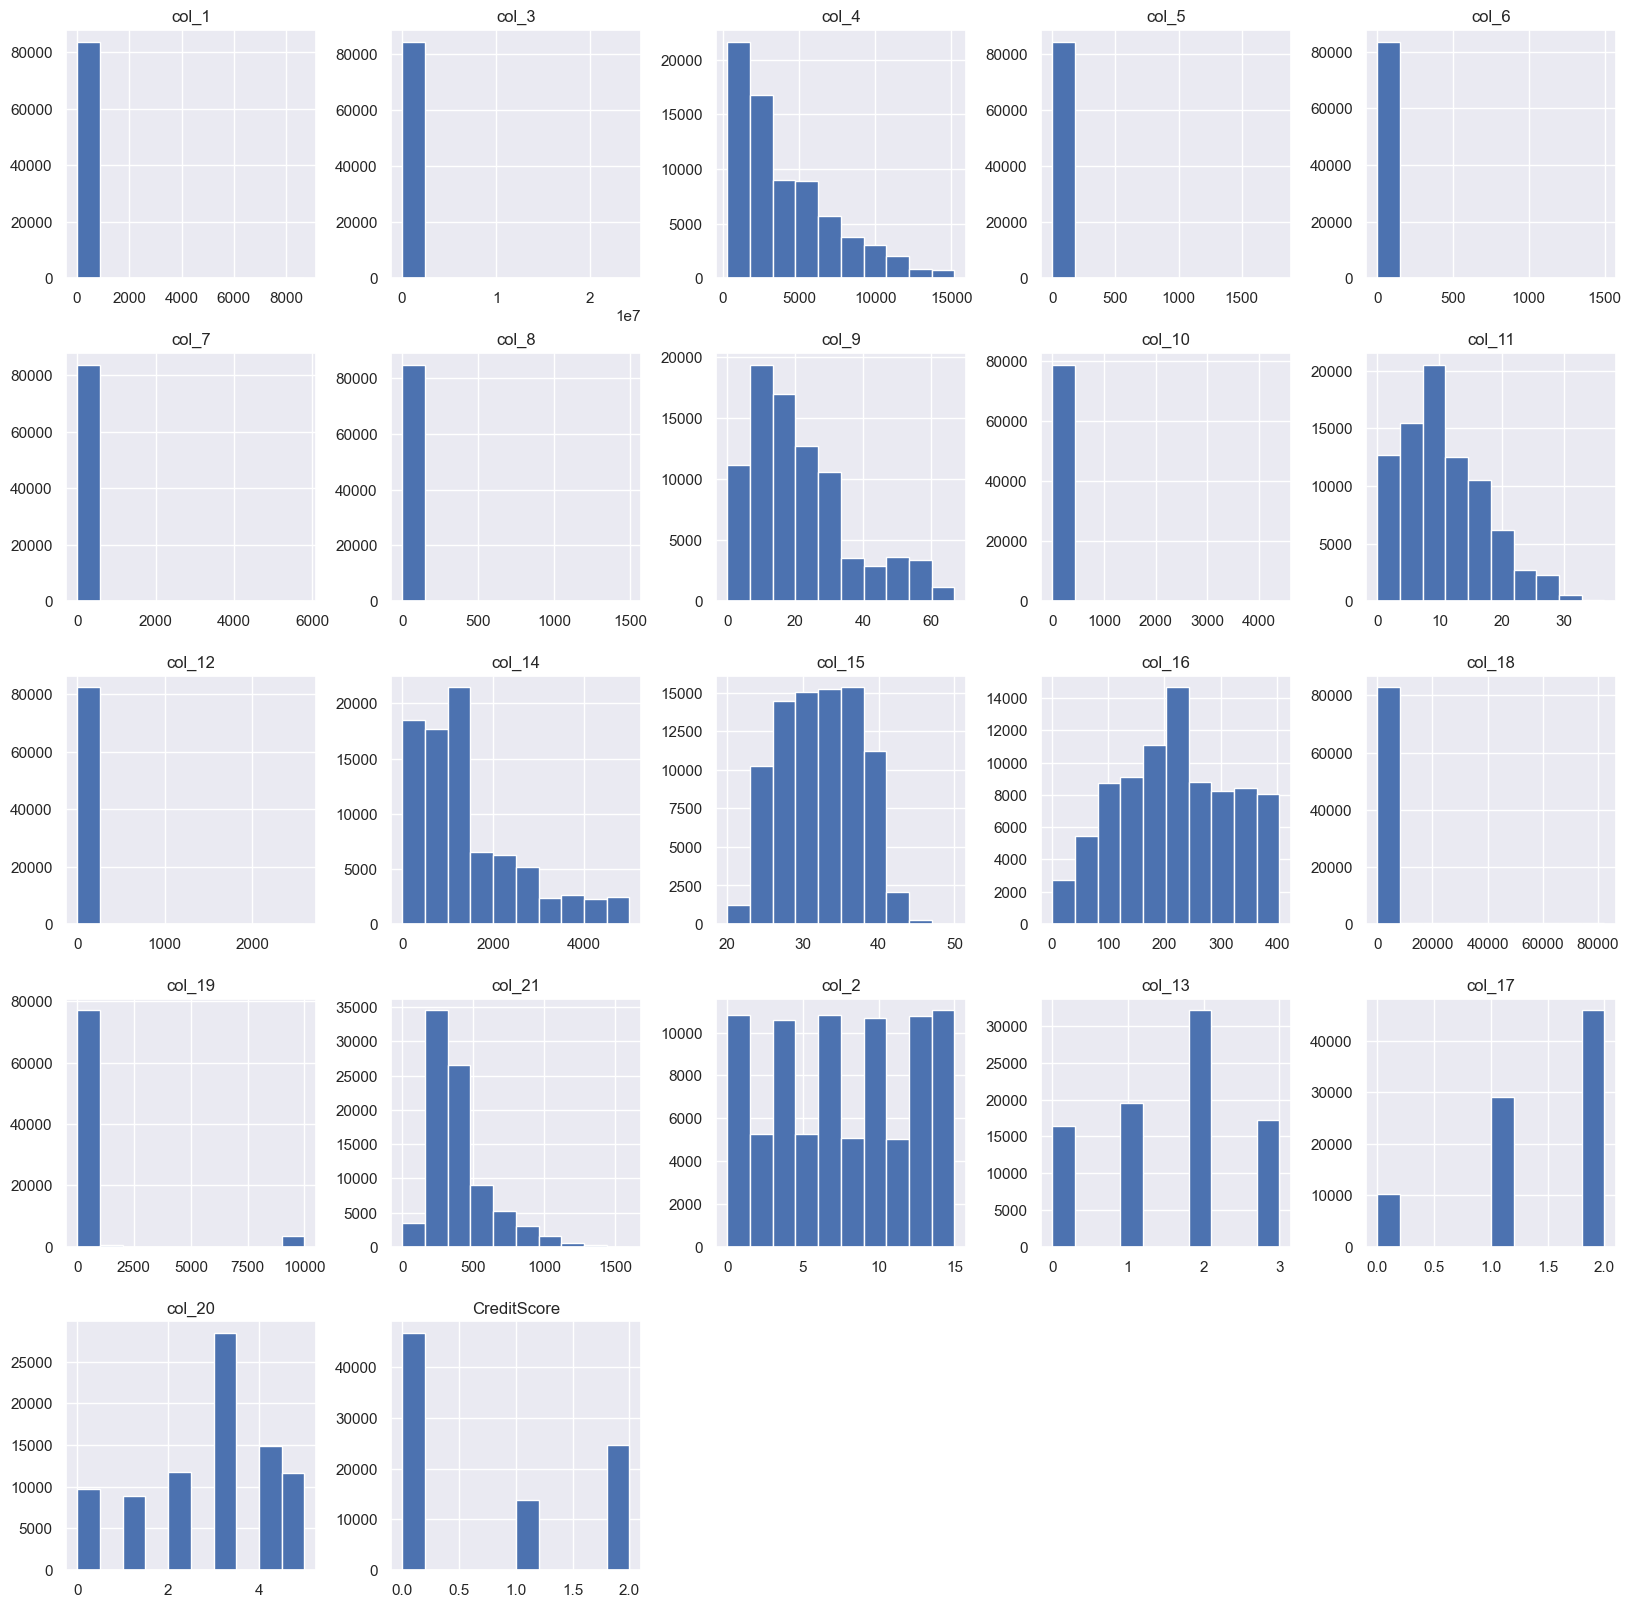

In [139]:
p = tempppp.hist(figsize = (20,20))

In [140]:
"""
print ("Shape Of The Before Ouliers: ",tempppp.shape)
n=5
tempppp_column = tempppp.columns
for i in range (len(tempppp_column)):
    if i < 22:
        print(tempppp_column[i])
        IQR = np.percentile(tempppp[tempppp_column[i]],75) - np.percentile(tempppp[tempppp_column[i]],25)
        tempppp=tempppp[tempppp[tempppp_column[i]] < np.percentile(tempppp[tempppp_column[i]],75)+n*IQR]
        tempppp=tempppp[tempppp[tempppp_column[i]] > np.percentile(tempppp[tempppp_column[i]],25)-n*IQR]
    
print ("Shape Of The After Ouliers: ",tempppp.shape)
"""

'\nprint ("Shape Of The Before Ouliers: ",tempppp.shape)\nn=5\ntempppp_column = tempppp.columns\nfor i in range (len(tempppp_column)):\n    if i < 22:\n        print(tempppp_column[i])\n        IQR = np.percentile(tempppp[tempppp_column[i]],75) - np.percentile(tempppp[tempppp_column[i]],25)\n        tempppp=tempppp[tempppp[tempppp_column[i]] < np.percentile(tempppp[tempppp_column[i]],75)+n*IQR]\n        tempppp=tempppp[tempppp[tempppp_column[i]] > np.percentile(tempppp[tempppp_column[i]],25)-n*IQR]\n    \nprint ("Shape Of The After Ouliers: ",tempppp.shape)\n'

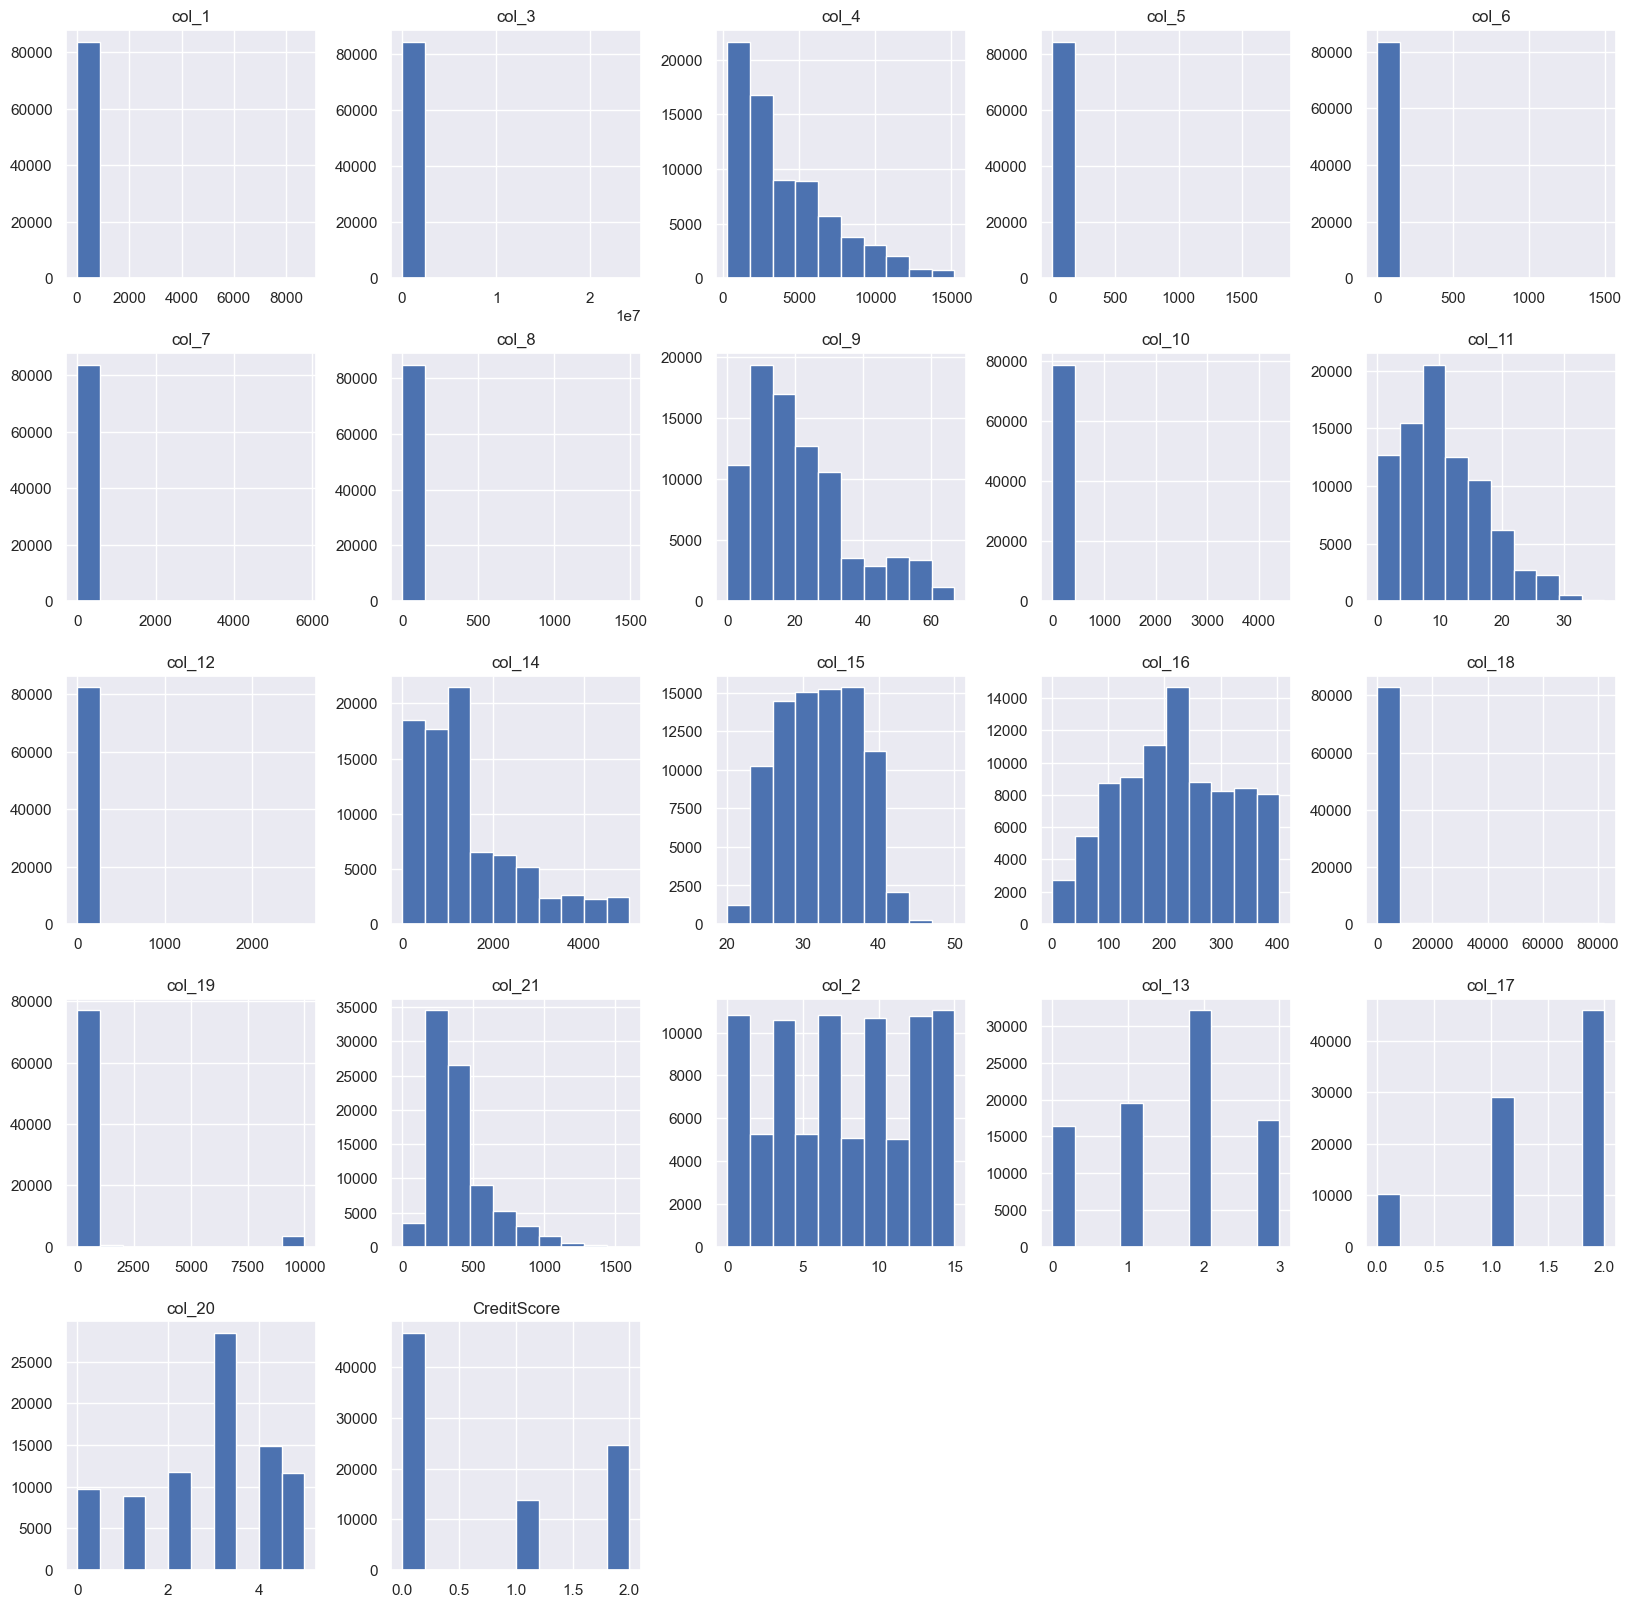

In [141]:
p = tempppp.hist(figsize = (20,20))

normalize

In [142]:
"""
from sklearn.preprocessing import MinMaxScaler
norm_data = tempppp.copy()
scaler = MinMaxScaler()
scaler = scaler.fit(tempppp.iloc[:,:17])
tempppp.iloc[:,:17] = scaler.transform(tempppp.iloc[:,:17])
tempppp.describe()
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nnorm_data = tempppp.copy()\nscaler = MinMaxScaler()\nscaler = scaler.fit(tempppp.iloc[:,:17])\ntempppp.iloc[:,:17] = scaler.transform(tempppp.iloc[:,:17])\ntempppp.describe()\n'

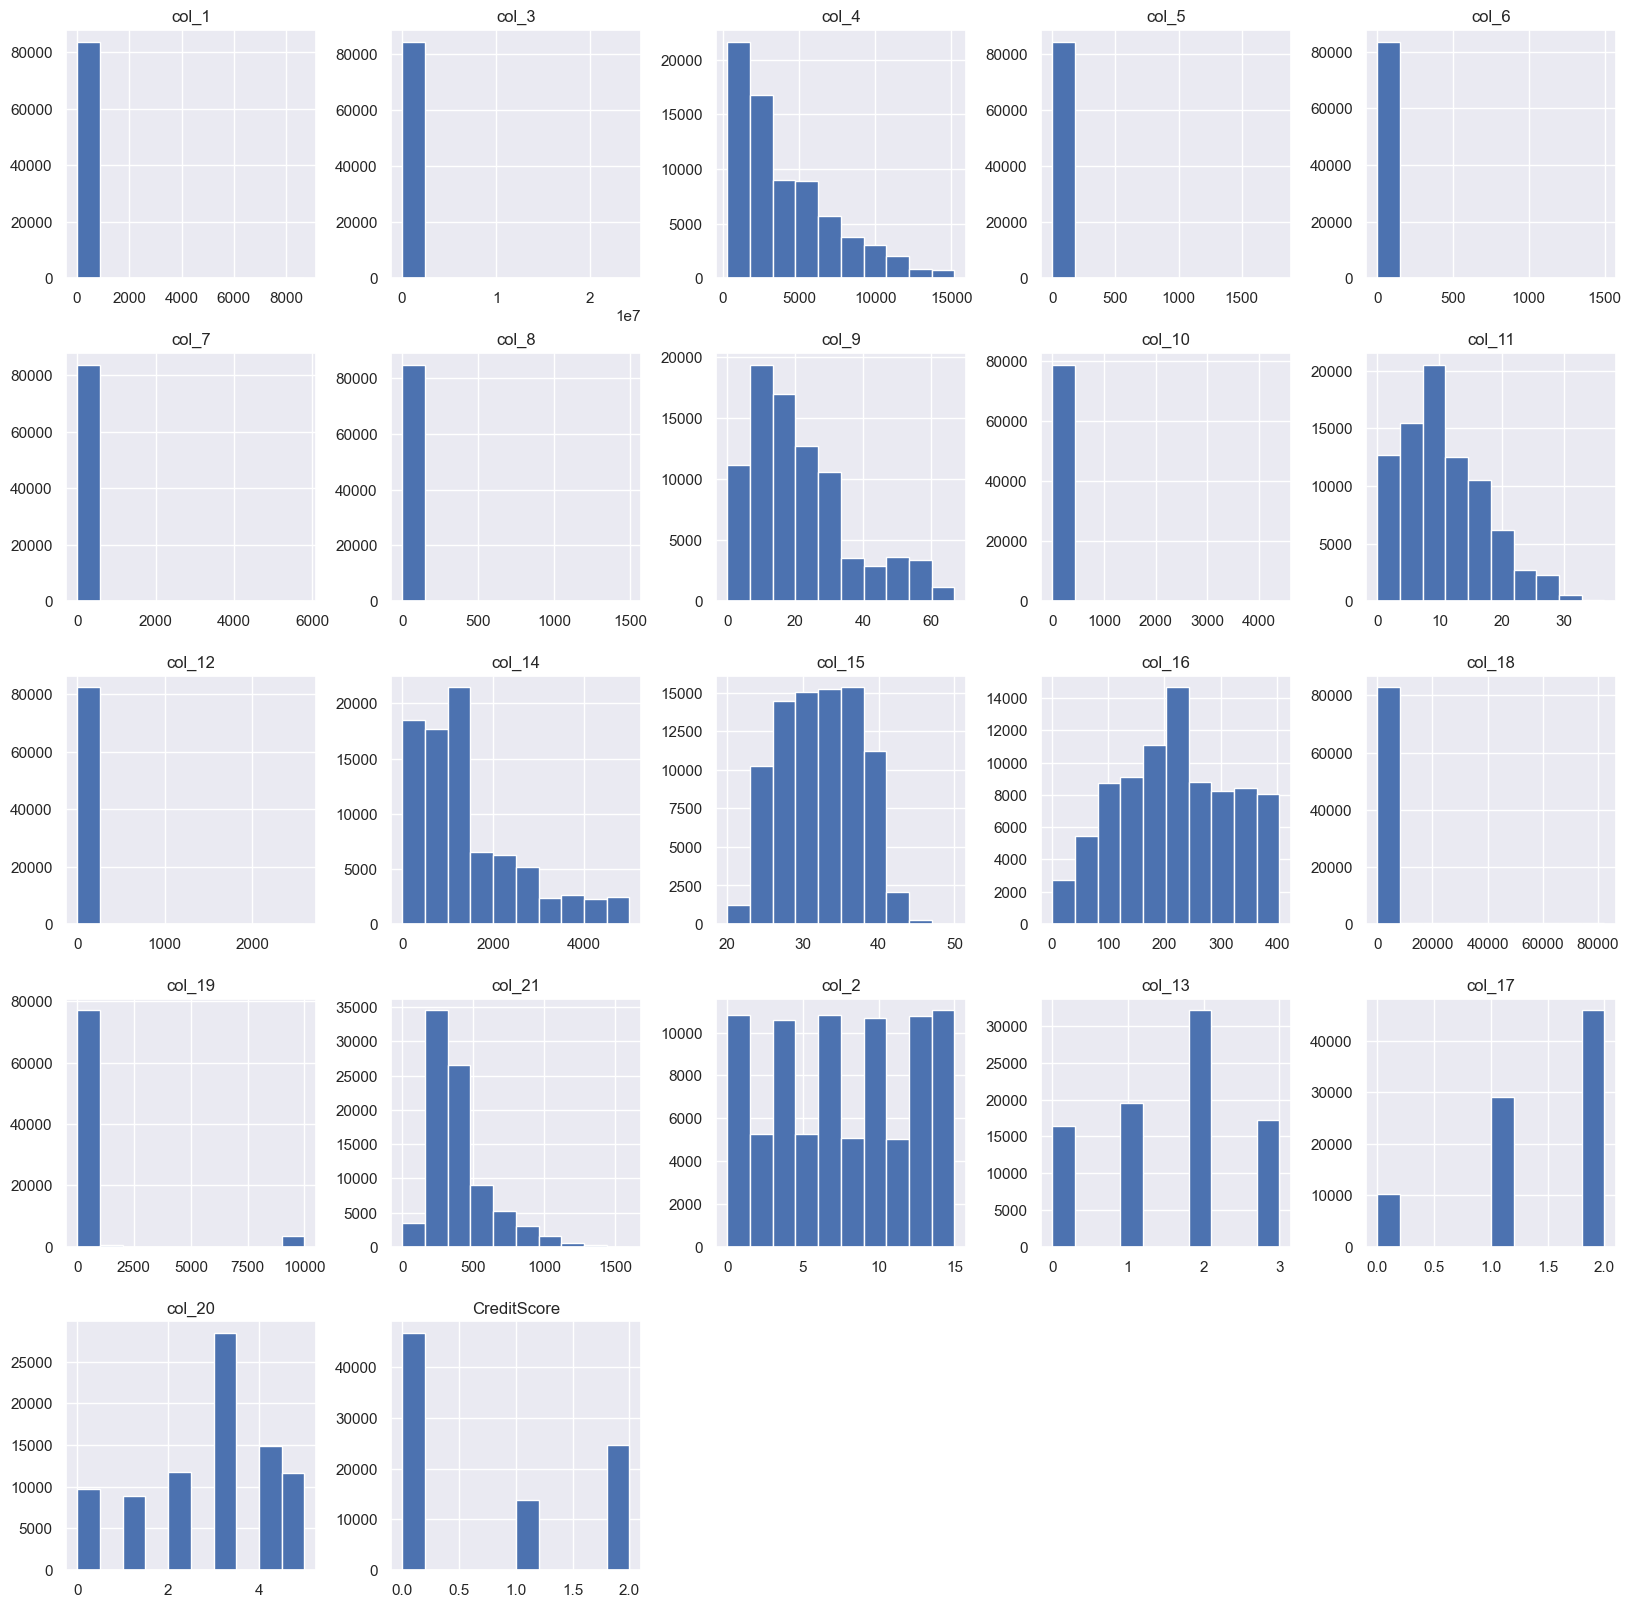

In [143]:
p = tempppp.hist(figsize = (20,20))

standardize

In [144]:

from sklearn.preprocessing import StandardScaler
#norm_data = tempppp.copy()
scaler = StandardScaler()
scaler = scaler.fit(tempppp.iloc[:,:17])
tempppp.iloc[:,:17] = scaler.transform(tempppp.iloc[:,:17])
tempppp.describe()


,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,...,col_15,col_16,col_18,col_19,col_21,col_2,col_13,col_17,col_20,CreditScore
count,85270.00,85270.00,72453.00,85270.00,85270.00,85270.00,85270.00,85270.00,79266.00,83471.00,...,85270.00,85270.00,85270.00,81434.00,84246.00,85270.00,85270.00,85270.00,85270.00,85270.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,0.00,7.53,1.59,1.42,2.76,0.74
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,4.64,1.02,0.70,1.50,0.88
min,-0.15,-0.12,-1.22,-0.15,-0.17,-0.15,-0.12,-1.45,-0.14,-1.60,...,-2.40,-2.19,-0.17,-0.31,-1.89,0.00,0.00,0.00,0.00,0.00
25%,-0.13,-0.11,-0.80,-0.11,-0.14,-0.14,-0.09,-0.77,-0.10,-0.76,...,-0.83,-0.78,-0.17,-0.27,-0.62,4.00,1.00,1.00,2.00,0.00
50%,-0.12,-0.10,-0.35,-0.10,-0.13,-0.13,-0.07,-0.23,-0.08,-0.16,...,0.00,-0.01,-0.16,-0.24,-0.31,7.00,2.00,2.00,3.00,0.00
75%,-0.11,-0.07,0.56,-0.08,-0.12,-0.11,-0.04,0.45,-0.06,0.67,...,0.82,0.81,-0.15,-0.18,0.31,12.00,2.00,2.00,4.00,2.00
max,12.49,16.83,3.50,15.20,11.47,12.21,24.36,3.09,19.37,3.87,...,3.47,1.85,9.72,4.59,5.67,15.00,3.00,2.00,5.00,2.00


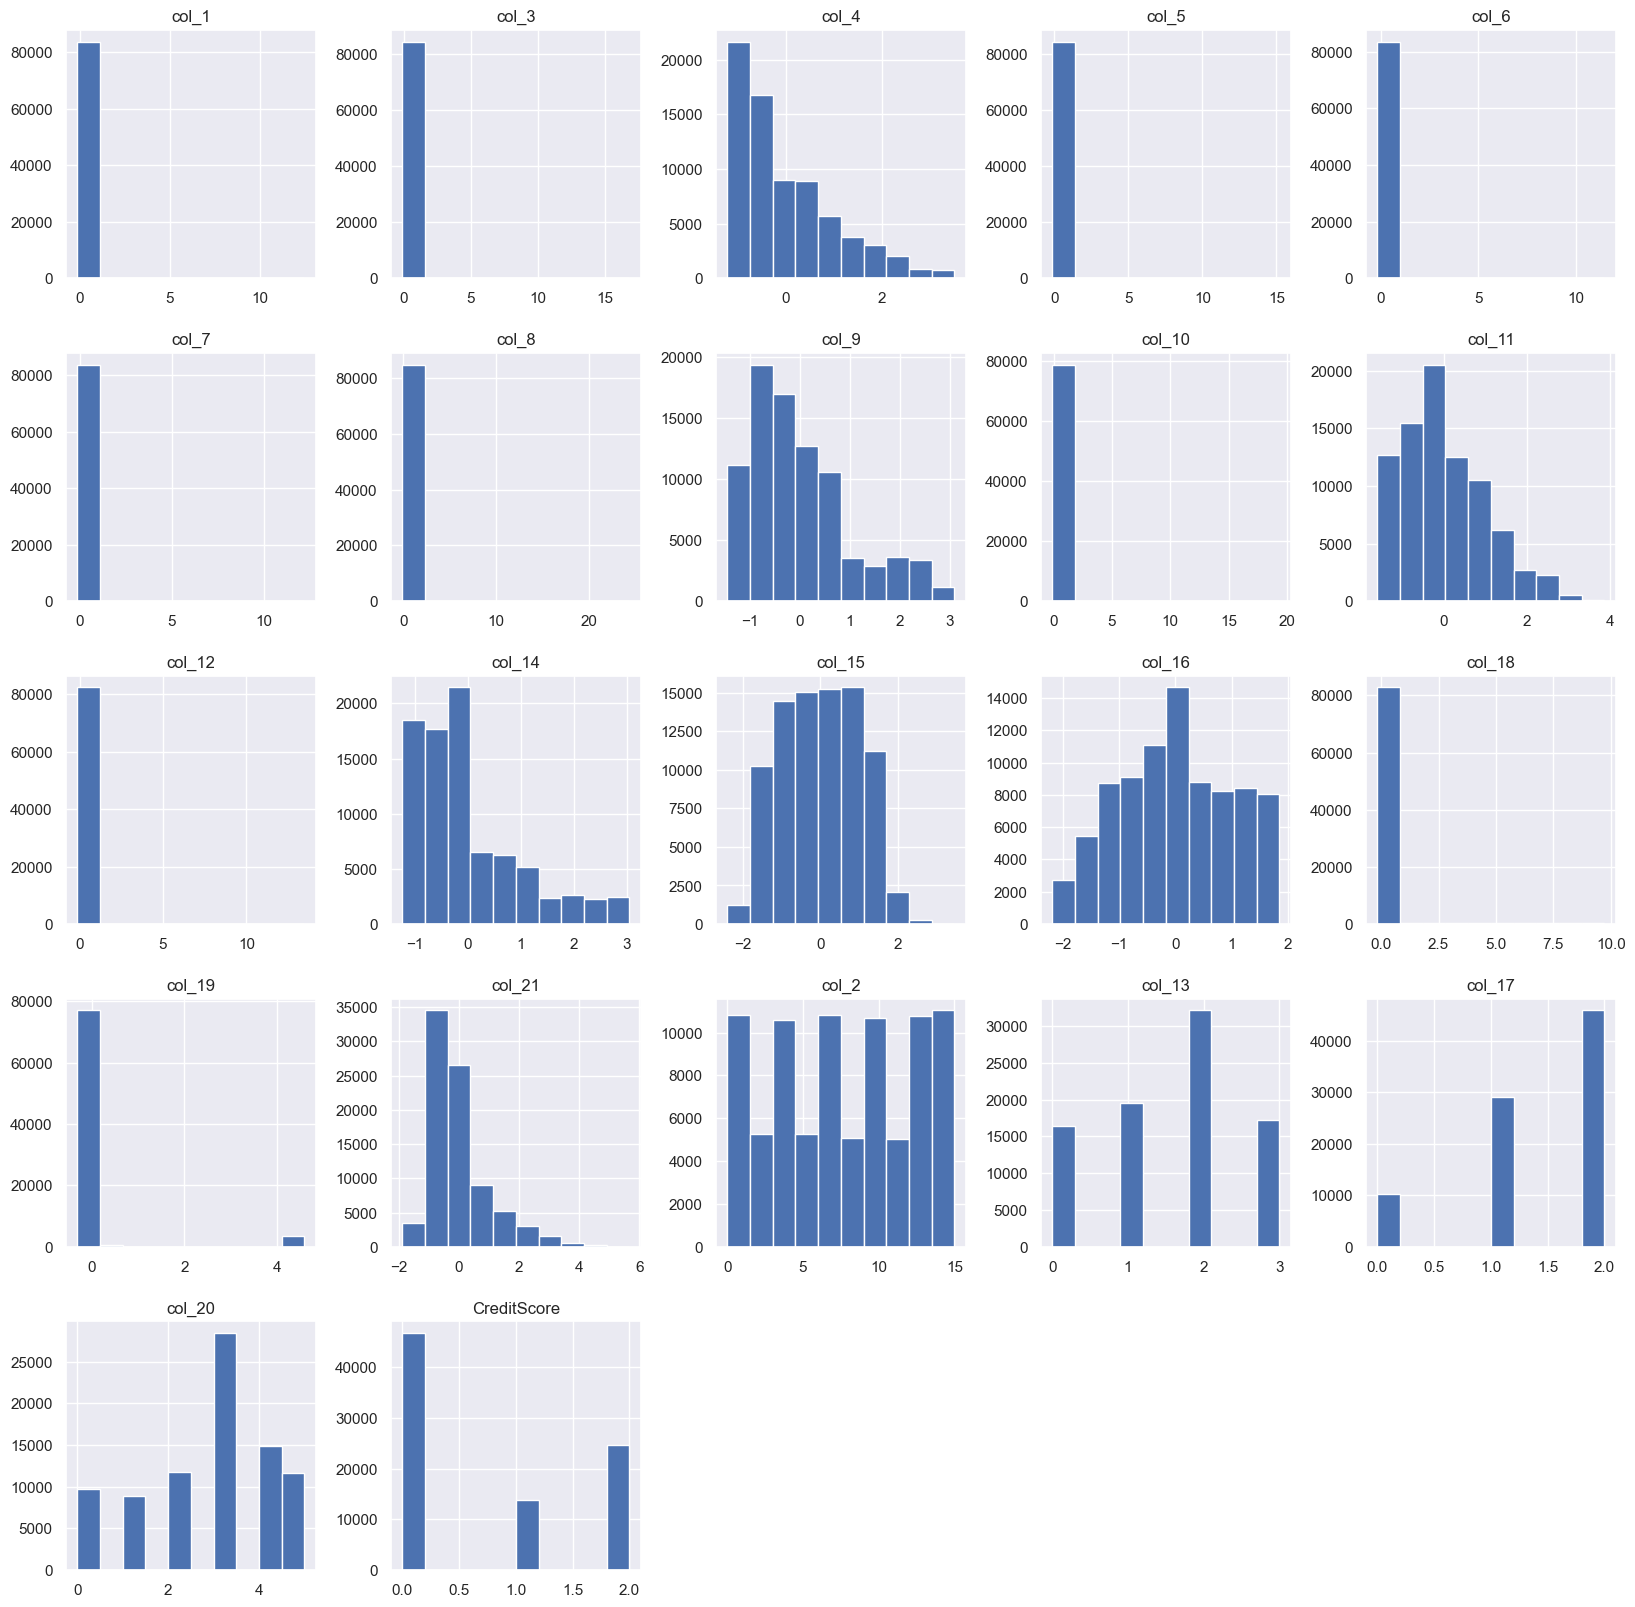

In [145]:
p = tempppp.hist(figsize = (20,20))

In [146]:
tempppp_test = pd.concat([numerical_data_test,data_nominal_test],axis = 1)

----------------------

In [147]:
"""
from sklearn.feature_selection import RFE
# Recursive Feature Elimination
def rfe_selection( X , Y, k=17):

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, 
        Y, 
        test_size = 0.2, 
        stratify=Y, 
        random_state = 9527)

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(
        criterion='entropy', 
        )
    rfe = RFE(model)
    rfe = rfe.fit(X_train_scaled, Y_train)

    feature_names = X.columns[rfe.get_support()]

    return feature_names
    """

"\nfrom sklearn.feature_selection import RFE\n# Recursive Feature Elimination\ndef rfe_selection( X , Y, k=17):\n\n    # Split train and test sets\n    X_train, X_test, Y_train, Y_test = train_test_split(\n        X, \n        Y, \n        test_size = 0.2, \n        stratify=Y, \n        random_state = 9527)\n\n    scaler = StandardScaler().fit(X_train)\n    X_train_scaled = scaler.transform(X_train)\n    X_test_scaled = scaler.transform(X_test)\n\n    model = RandomForestClassifier(\n        criterion='entropy', \n        )\n    rfe = RFE(model)\n    rfe = rfe.fit(X_train_scaled, Y_train)\n\n    feature_names = X.columns[rfe.get_support()]\n\n    return feature_names\n    "

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
b = tempppp['CreditScore']
a = tempppp.drop("CreditScore",axis=1)

In [149]:
#bb =  rfe_selection(a,b)

In [150]:
#print(bb)

In [151]:
"""
for i in range (len(tempppp_column)):
    if tempppp_column[i] not in bb and tempppp_column[i]!='CreditScore':
        tempppp = tempppp.drop(tempppp_column[i],axis=1)
        tempppp_test = tempppp_test.drop(tempppp_column[i],axis=1)
        """

"\nfor i in range (len(tempppp_column)):\n    if tempppp_column[i] not in bb and tempppp_column[i]!='CreditScore':\n        tempppp = tempppp.drop(tempppp_column[i],axis=1)\n        tempppp_test = tempppp_test.drop(tempppp_column[i],axis=1)\n        "

In [152]:
tempppp.isnull().sum()

col_1              0
col_3              0
col_4          12817
col_5              0
col_6              0
col_7              0
col_8              0
col_9              0
col_10          6004
col_11          1799
col_12          1661
col_14             0
col_15             0
col_16             0
col_18             0
col_19          3836
col_21          1024
col_2              0
col_13             0
col_17             0
col_20             0
CreditScore        0
dtype: int64

In [153]:
tempppp_test.isnull().sum()

col_1       0
col_3       0
col_4     988
col_5       0
col_6       0
col_7       0
col_8       0
col_9       0
col_10    461
col_11    159
col_12    125
col_14      0
col_15      0
col_16      0
col_18      0
col_19    293
col_21     81
col_2       0
col_13      0
col_17      0
col_20      0
dtype: int64

In [154]:
tempppp.to_csv('train_precessed.csv',index_label=False)
tempppp_test.to_csv('test_precessed.csv',index_label=False)